In [1]:
# Importing Required Library
import pandas as pd
import numpy as np

#Importing Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Unsupervised learning library
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#Importing matric for optimize k value
from sklearn.metrics import silhouette_score

#Scaling
from sklearn.preprocessing import StandardScaler

#Importing warnings
import warnings
warnings.filterwarnings("ignore")

`Objective: `

categorise the countries using some socio-economic and health factors that determine the overall development of the country.
Then you need to suggest the countries which the CEO needs to focus on the most.

In [2]:
#Step 1: Reading and Understand Data
country=pd.read_csv("Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# checking Data Type for Variable
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB


In [4]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
#check Null value
country.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Here we see no null value present in data but some attribute are scaled in pertage so we convert to associated format.

In [6]:
#Sanity check
country.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [7]:
country_cnt=country.country.value_counts()
country_cnt.reset_index()
country_cnt[country_cnt>1]
# Here all countries are unique..

Series([], Name: country, dtype: int64)

In [8]:
# Changing Percentage Value into associated value
country["exports"]=country["exports"]*country["gdpp"]/100
country["health"]=country["health"]*country["gdpp"]/100
country["imports"]=country["imports"]*country["gdpp"]/100

In [9]:
#Rechecking data description
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
# changing dtype into appropriate numeric 
#col=country.select_dtypes('float').columns.tolist()
#country[col]=country[col].astype('int')

In [11]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB


In [12]:
#Step 2:Clean Data
## 1. Outlier Detection
### !)for handling outlier we use capping approach
# Because a oulier be affecting during clustering.........

In [13]:
# Univariate Analysis
# Here we use function to reduce redundant work......
def box(var):
    plt.figure(figsize=[15,3])
    sns.boxplot(var,data=country)
    plt.title("Distribution of "+"%s"%var,fontsize=15)
def cap_upper(var):
    Q1=int(country[var].quantile([0.25]))
    Q3=int(country[var].quantile([0.75]))
    IQR=Q3-Q1
    hi=Q3+1.5*IQR
    country[var]=country[var].apply(lambda x:hi if x>hi else x)
def cap_lower(var):
    # Capping a lower outlier
    Q1=int(country[var].quantile([0.25]))
    Q3=int(country[var].quantile([0.75]))
    IQR=Q3-Q1
    Lo=Q1-1.5*IQR
    country[var]=country[var].apply(lambda x:Lo if x<Lo else x)

### Univariate Analysis: Numerical Data

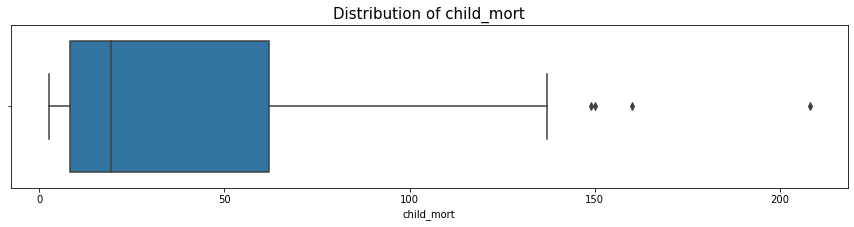

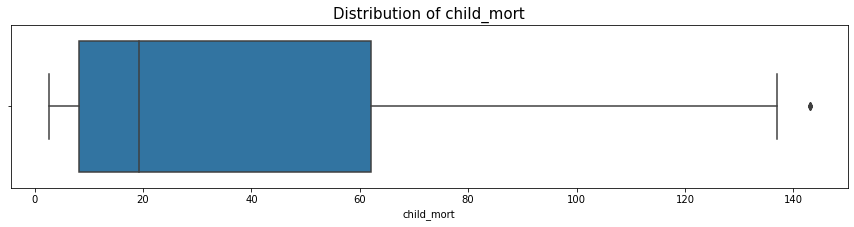

In [14]:
box("child_mort")
cap_upper("child_mort")
box("child_mort")

**`Inference`**
- Also most of countries has child mortality rate count  in between 20 to 62 Death of children under 5 years of age per 1000 live births.

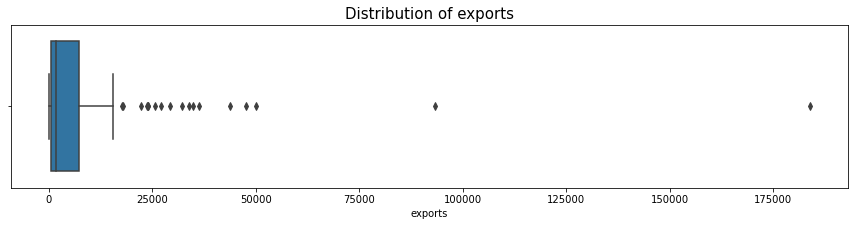

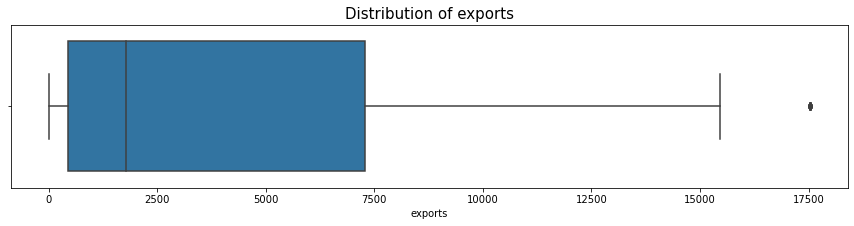

In [15]:
box("exports")
cap_upper("exports")
box("exports")

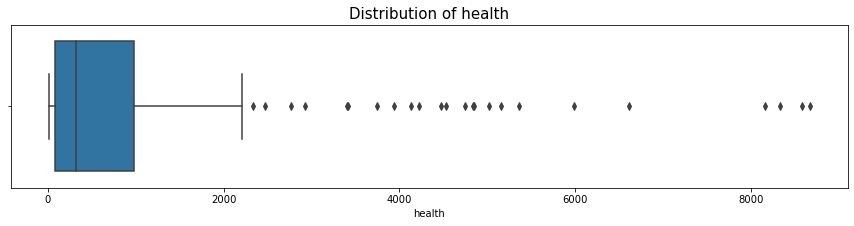

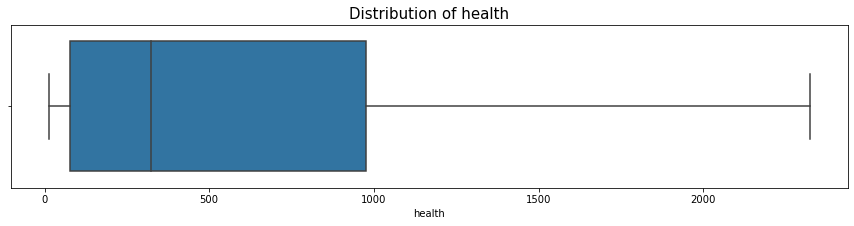

In [16]:
box("health")
cap_upper("health")
box("health")

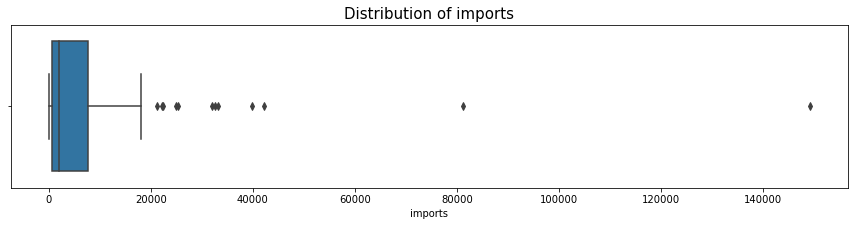

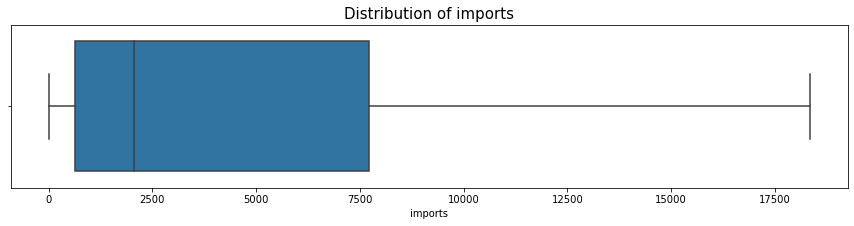

In [17]:
#Upper Capping Data
box("imports")
cap_upper("imports")
box("imports")

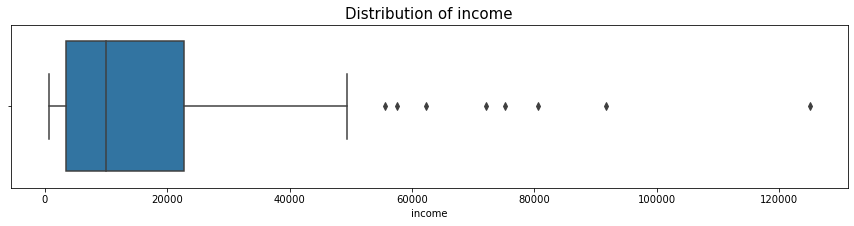

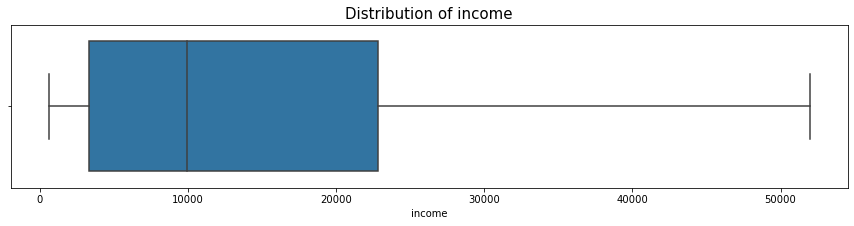

In [18]:
box("income")
cap_upper("income")
box("income")

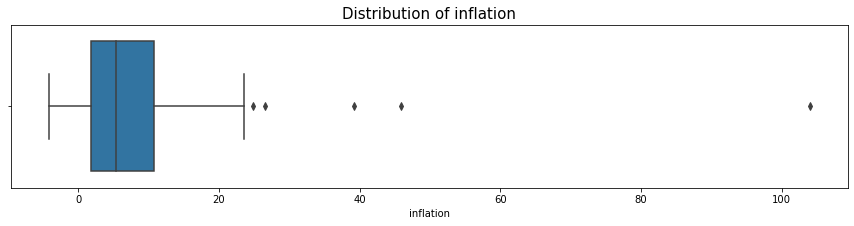

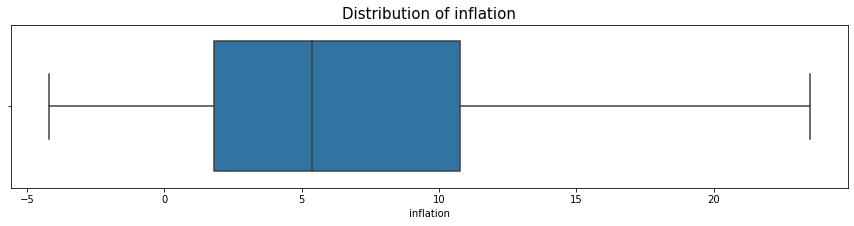

In [19]:
box("inflation")
cap_upper("inflation")
box("inflation")

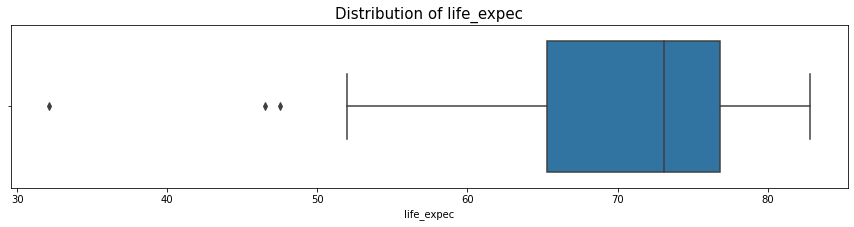

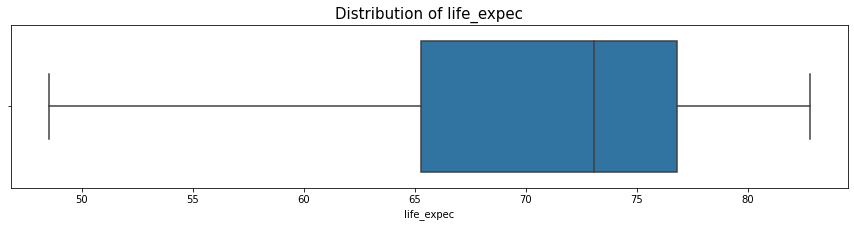

In [20]:
box("life_expec")
cap_lower("life_expec")
box("life_expec")

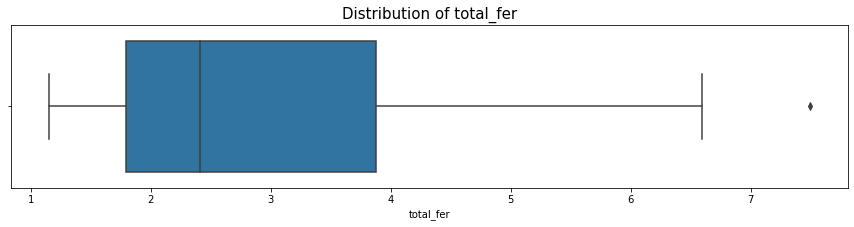

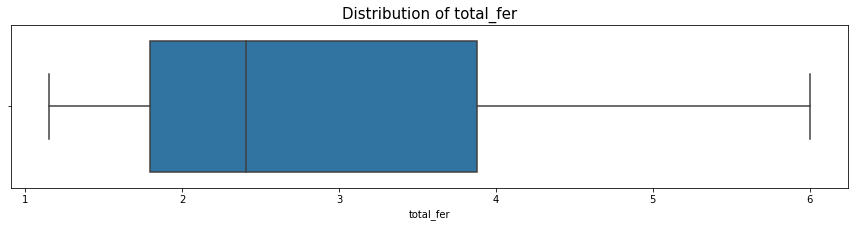

In [21]:
box("total_fer")
cap_upper("total_fer")
box("total_fer")

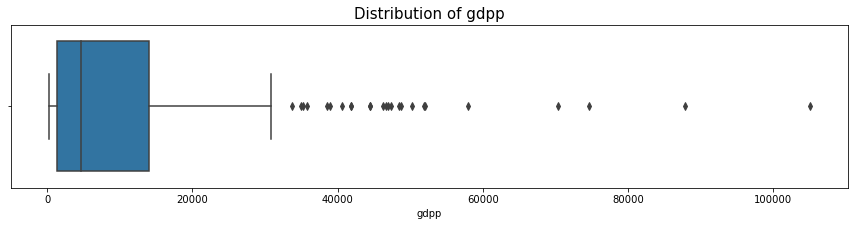

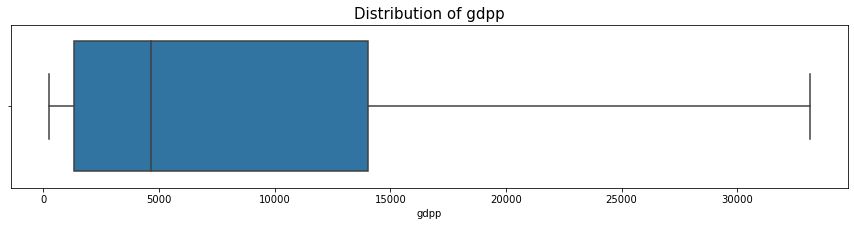

In [22]:
box("gdpp")
cap_upper("gdpp")
box("gdpp")

### Bivariate Analysis: Categorical and Numeric Variable

In [23]:
# top 10 counties has high child-montality rate count
country_sort=country.sort_values(by="child_mort",ascending=False)

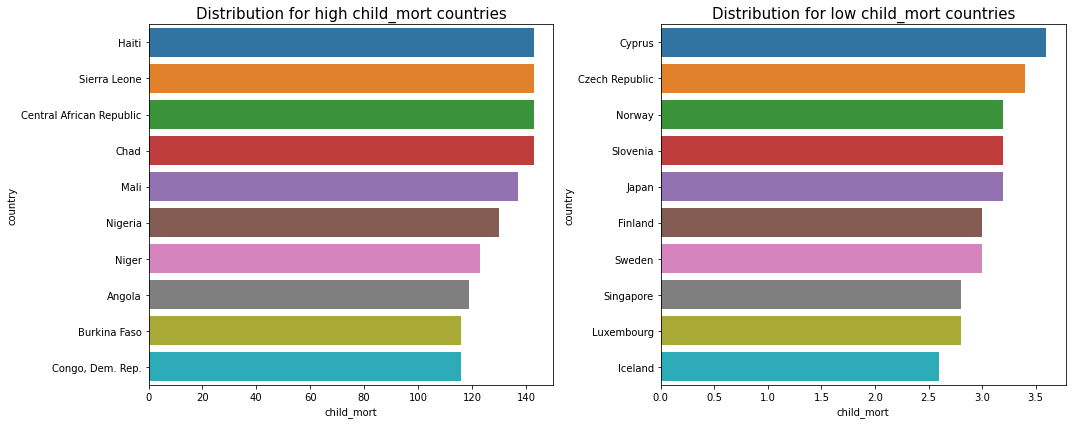

In [24]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.barplot(country_sort.child_mort.head(10),country_sort.country.head(10))
plt.title("Distribution for high child_mort countries",fontsize=15)
plt.subplot(1,2,2)
sns.barplot(country_sort.child_mort.tail(10),country_sort.country.tail(10))
plt.title("Distribution for low child_mort countries",fontsize=15)
plt.tight_layout();

**`inference`**:
- **highest count of child mortality top 10 countries are**:

['Haiti',
 'Sierra Leone',
 'Central African Republic',
 'Chad',
 'Mali',
 'Nigeria',
 'Niger',
 'Angola',
 'Burkina Faso',
 'Congo, Dem. Rep.']
 
 - **Lowest count of child mortality top 10 contries are:**
 
['Cyprus',
 'Czech Republic',
 'Norway',
 'Slovenia',
 'Japan',
 'Finland',
 'Sweden',
 'Singapore',
 'Luxembourg',
 'Iceland']
 
 - For highest mortality count in between 119-140 and lowest countries mortality count in between 2 to 3.5

In [25]:
# top 10 counties has high export rate count
export_sort=country.sort_values(by="exports",ascending=False)

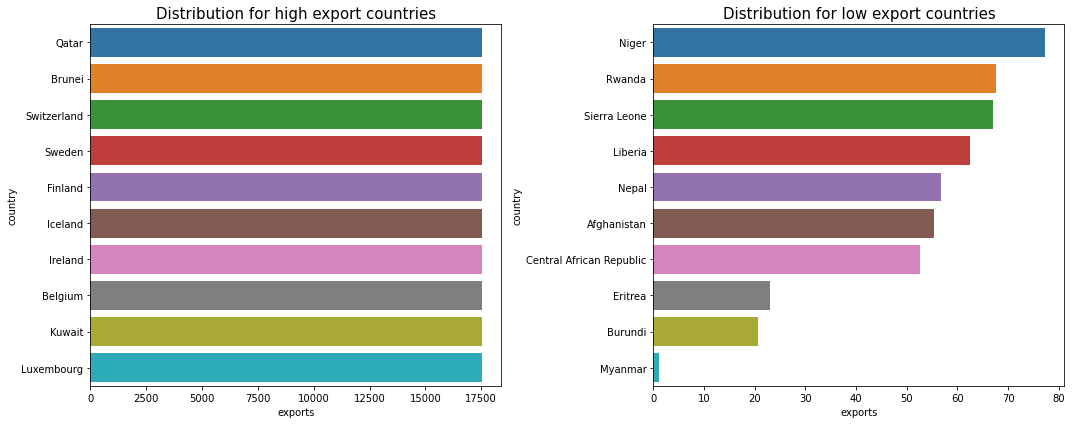

In [26]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.barplot(export_sort.exports.head(10),export_sort.country.head(10))
plt.title("Distribution for high export countries",fontsize=15)
plt.subplot(1,2,2)
sns.barplot(export_sort.exports.tail(10),export_sort.country.tail(10))
plt.title("Distribution for low export countries",fontsize=15)
plt.tight_layout();

**`inference`**:
- **Highest export of goods and services per capita, top 10 countries are**:

['Qatar',
 'Brunei',
 'Switzerland',
 'Sweden',
 'Finland',
 'Iceland',
 'Ireland',
 'Belgium',
 'Kuwait',
 'Luxembourg']
 
 - **Lowest exports of goods and services per capita, top 10 countries are**:
 
['Niger',
 'Rwanda',
 'Sierra Leone',
 'Liberia',
 'Nepal',
 'Afghanistan',
 'Central African Republic',
 'Eritrea',
 'Burundi',
 'Myanmar']
 

In [27]:
# top 10 counties has high import rate count
import_sort=country.sort_values(by="imports",ascending=False)

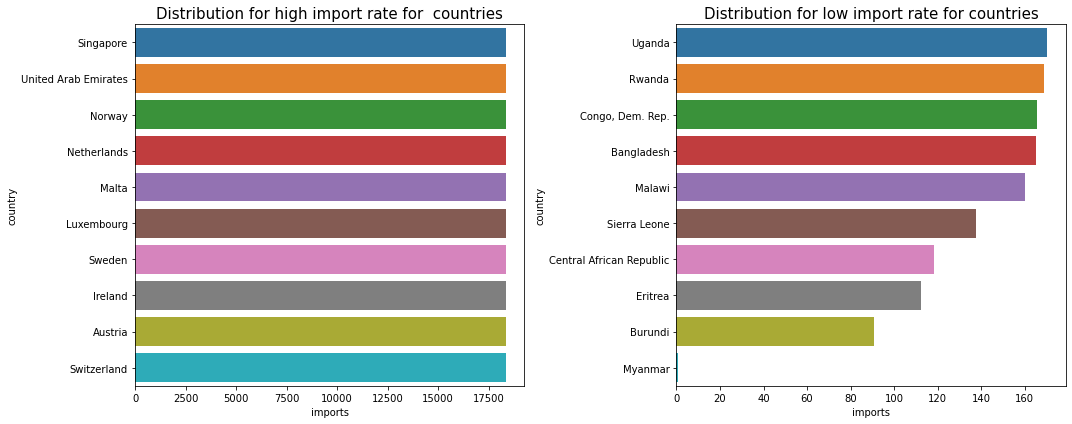

In [28]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.barplot(import_sort.imports.head(10),import_sort.country.head(10))
plt.title("Distribution for high import rate for  countries",fontsize=15)
plt.subplot(1,2,2)
sns.barplot(import_sort.imports.tail(10),import_sort.country.tail(10))
plt.title("Distribution for low import rate for countries",fontsize=15)
plt.tight_layout();

**`inference`**:
- **Highest Imports of goods and services per capita, top 10 countries are**:

['Singapore',
 'United Arab Emirates',
 'Norway',
 'Netherlands',
 'Malta',
 'Luxembourg',
 'Sweden',
 'Ireland',
 'Austria',
 'Switzerland']
 
- **lowest Imports of goods and services per capita, top 10 countries are**:

['Uganda',
 'Rwanda',
 'Congo, Dem. Rep.',
 'Bangladesh',
 'Malawi',
 'Sierra Leone',
 'Central African Republic',
 'Eritrea',
 'Burundi',
 'Myanmar']

In [29]:
# top 10 counties has high import rate count
health_sort=country.sort_values(by="health",ascending=False)

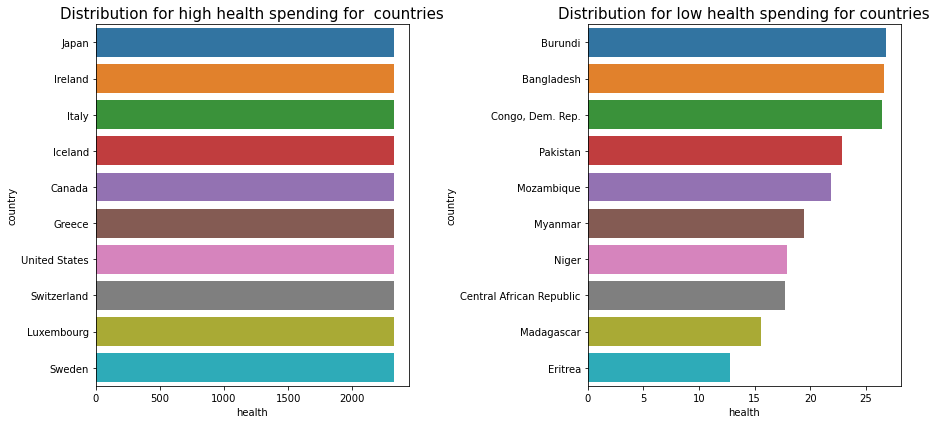

In [30]:
plt.figure(figsize=[13,6])
plt.subplot(1,2,1)
sns.barplot(health_sort.health.head(10),health_sort.country.head(10))
plt.title("Distribution for high health spending for  countries",fontsize=15)
plt.subplot(1,2,2)
sns.barplot(health_sort.health.tail(10),health_sort.country.tail(10))
plt.title("Distribution for low health spending for countries",fontsize=15)
plt.tight_layout();

**`inference`**:
- **Total highest health spending per capita , top 10 countries are**:

['Japan',
 'Ireland',
 'Italy',
 'Iceland',
 'Canada',
 'Greece',
 'United States',
 'Switzerland',
 'Luxembourg',
 'Sweden']
 
- **Total lowest health spending per capita , top 10 countries are**:

['Burundi',
 'Bangladesh',
 'Congo, Dem. Rep.',
 'Pakistan',
 'Mozambique',
 'Myanmar',
 'Niger',
 'Central African Republic',
 'Madagascar',
 'Eritrea']

In [31]:
# top 10 counties has high net income per capita 
income_sort=country.sort_values(by="income",ascending=False)

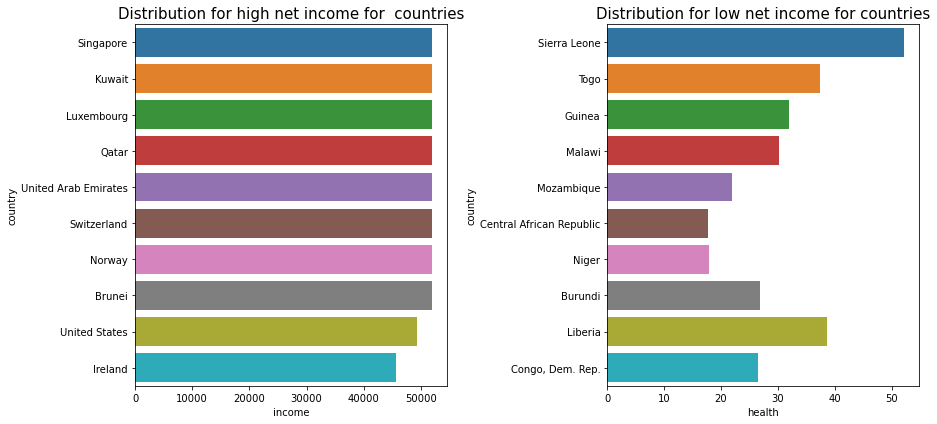

In [32]:
plt.figure(figsize=[13,6])
plt.subplot(1,2,1)
sns.barplot(income_sort.income.head(10),income_sort.country.head(10))
plt.title("Distribution for high net income for  countries",fontsize=15)
plt.subplot(1,2,2)
sns.barplot(income_sort.health.tail(10),income_sort.country.tail(10))
plt.title("Distribution for low net income for countries",fontsize=15)
plt.tight_layout();

**`inference`**:
- **Highest net income per person , top 10 countries are**:

['Singapore',
 'Kuwait',
 'Luxembourg',
 'Qatar',
 'United Arab Emirates',
 'Switzerland',
 'Norway',
 'Brunei',
 'United States',
 'Ireland']
 
 - **Lowest net income per person , top 10 countries are**:
 
 ['Sierra Leone',
 'Togo',
 'Guinea',
 'Malawi',
 'Mozambique',
 'Central African Republic',
 'Niger',
 'Burundi',
 'Liberia',
 'Congo, Dem. Rep.']

In [33]:
# top 10 counties has high net income per capita 
gdpp_sort=country.sort_values(by="gdpp",ascending=False)

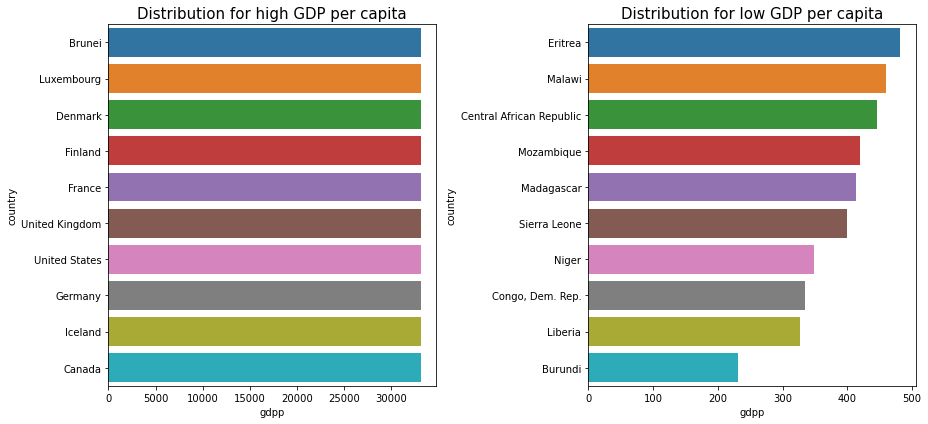

In [34]:
plt.figure(figsize=[13,6])
plt.subplot(1,2,1)
sns.barplot(gdpp_sort.gdpp.head(10),gdpp_sort.country.head(10))
plt.title("Distribution for high GDP per capita",fontsize=15)
plt.subplot(1,2,2)
sns.barplot(gdpp_sort.gdpp.tail(10),gdpp_sort.country.tail(10))
plt.title("Distribution for low GDP per capita",fontsize=15)
plt.tight_layout();

In [35]:
#gdpp_sort.country.tail(10).tolist()
#gdpp_sort.country.head(10).tolist()

**`inference`**:
- **Highest GDP per capita, top 10 countries are**:

['Brunei',
 'Luxembourg',
 'Denmark',
 'Finland',
 'France',
 'United Kingdom',
 'United States',
 'Germany',
 'Iceland',
 'Canada']
 
- **Lowest GDP per capita, top 10 countries are**:

['Eritrea',
 'Malawi',
 'Central African Republic',
 'Mozambique',
 'Madagascar',
 'Sierra Leone',
 'Niger',
 'Congo, Dem. Rep.',
 'Liberia',
 'Burundi']

In [36]:
# so we look if counties has high child_mort and low export,import,health,income,gdpp those are required more support from NGO
chid_mort_high=country_sort.country.head(20).tolist()
low_export=export_sort.country.tail(20).tolist()
low_import=import_sort.country.tail(20).tolist()
low_health=health_sort.country.tail(20).tolist()
low_income=income_sort.country.tail(20).tolist()
low_gdpp=gdpp_sort.country.tail(20).tolist()
d = {'chid_mort_high' : pd.Series(chid_mort_high),'low_export' : pd.Series(low_export),'low_import': pd.Series(low_import),'low_health': pd.Series(low_health),'low_income': pd.Series(low_income),'low_gdpp': pd.Series(low_gdpp)}
df = pd.DataFrame(d)
df

,chid_mort_high,low_export,low_import,low_health,low_income,low_gdpp
0,Haiti,Comoros,Afghanistan,Burkina Faso,Gambia,Haiti
1,Sierra Leone,Bangladesh,Gambia,Liberia,Afghanistan,Guinea
2,Central African Republic,Burkina Faso,Nepal,Togo,Uganda,Uganda
3,Chad,Tajikistan,Tanzania,Mali,Haiti,Nepal
4,Mali,Malawi,Pakistan,Comoros,Burkina Faso,Burkina Faso
5,Nigeria,Madagascar,Mozambique,Gambia,Eritrea,Rwanda
6,Niger,Uganda,Guinea-Bissau,Guinea,Comoros,Gambia
7,Angola,Haiti,Madagascar,Nepal,Guinea-Bissau,Afghanistan
8,Burkina Faso,Guinea-Bissau,Niger,Benin,Madagascar,Guinea-Bissau
9,"Congo, Dem. Rep.",Timor-Leste,Burkina Faso,Malawi,Rwanda,Togo


In [37]:
# Listing Poor contries ....... with help of visualization
poor_countries=[]
for i in chid_mort_high:
    if i in low_export:
        poor_countries.append(i)
    if i in low_import:
        poor_countries.append(i)
    if i in low_health:
        poor_countries.append(i)
    if i in low_income:
        poor_countries.append(i)
    if i in low_gdpp:
        poor_countries.append(i)
poor_countries=pd.DataFrame({"countries":poor_countries})
poor_countries["countries"].unique().tolist()

['Haiti',
 'Sierra Leone',
 'Central African Republic',
 'Mali',
 'Niger',
 'Burkina Faso',
 'Congo, Dem. Rep.',
 'Guinea-Bissau',
 'Benin',
 'Guinea',
 'Mozambique',
 'Burundi']

### Numeric-Numeric anlaysis

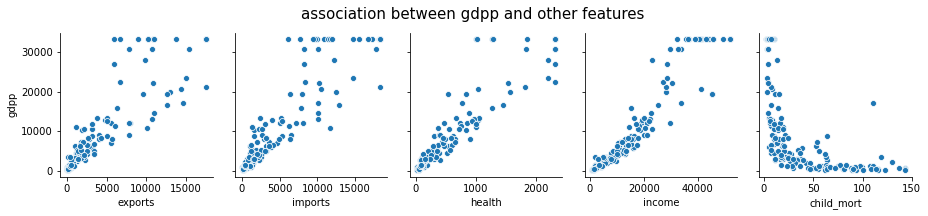

In [38]:
g=sns.pairplot(x_vars=["exports","imports","health","income","child_mort"],y_vars="gdpp",data=country);
g.fig.suptitle("association between gdpp and other features",fontsize=15,y=1.12);

**`inference :`**
- In scatter plot we see all feature with respect to gdpp are monotonic in nature(i.e It will increasing or descresing).
- In export and import if it below 5000 then gdp be increase upto 10000 .
- if export and import are high(inceasing ) then gdp also increasing.
- Here we see another view like spending more on health so gdp per capita also increasing as same for net income.
- In child_mort Vs Gdp we observed as much as less count of child moratality it be inceasing Gdp for countries .

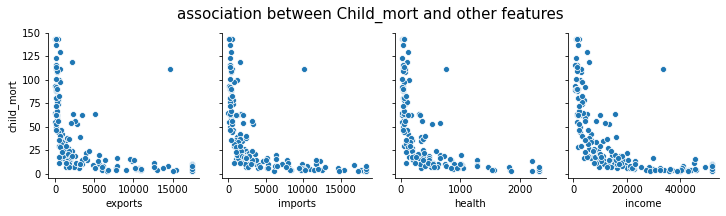

In [39]:
g=sns.pairplot(x_vars=["exports","imports","health","income"],y_vars="child_mort",data=country);
g.fig.suptitle("association between Child_mort and other features",fontsize=15,y=1.12);

**`inference`**:
- Here we observed specific trends between child_mort count  and other feature(i.e. variable)
- We only see as perspective of medical domain problem when if countries spend less money for health so count child_mortality be more.because of less medicine,beds,ventilators etc,so country need to carefull.
- We see if person net income is less then count for child_mort be increasing . For NGO need to relese some fund to people for medical.

### Multivariate analysis:

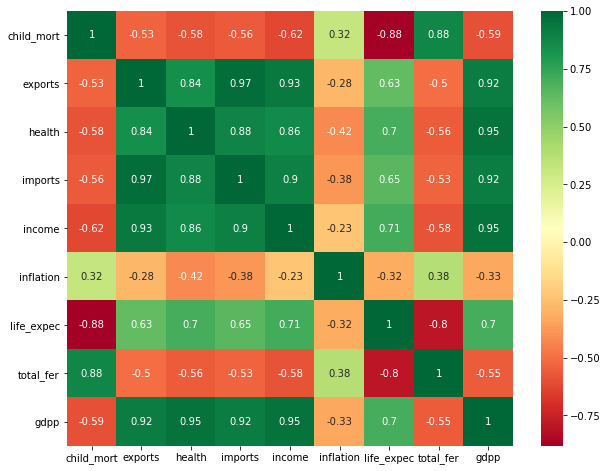

In [40]:
plt.figure(figsize=[10,8])
sns.heatmap(country.corr(),cmap="RdYlGn",annot=True);

**`inference`**:
- Here we see strong (positve or negetive) corrleationship in attributes.
- we listing strong correlation are...
    - child_mort-life_expec
    - child_mort-total_fer
    - exports-gdpp
    - health-gdpp
    - import-gdpp
    - income-gdpp
    - export-income,import
    - health-import
- for clustring we required some attributes have explain a data more so we use PCA(Dimentionality Reduction Method).

# Step 5:Modeling
## Choosing optimal k value by silhoutte score

In [41]:
sample=country[["child_mort","income","gdpp"]]
scale2=StandardScaler()
sample_scale=scale2.fit_transform(sample)

In [42]:
sample_scale

array([[ 1.36943013e+00, -9.43935746e-01, -8.46341070e-01],
       [-5.50424287e-01, -3.95180945e-01, -5.40827457e-01],
       [-2.71315016e-01, -1.99291311e-01, -5.08868159e-01],
       [ 2.12067752e+00, -6.60984052e-01, -5.89198286e-01],
       [-7.14759652e-01,  2.09636546e-01,  1.59685804e-01],
       [-6.05202742e-01,  1.83254103e-01, -4.42951008e-03],
       [-5.11296819e-01, -6.08219167e-01, -6.15974995e-01],
       [-8.58227033e-01,  1.68045771e+00,  1.96754555e+00],
       [-8.71269523e-01,  1.79917870e+00,  1.96754555e+00],
       [ 3.90962283e-02,  5.17261748e-03, -3.89668615e-01],
       [-6.23462227e-01,  4.60269748e-01,  1.52443420e+00],
       [-7.59104115e-01,  1.66067087e+00,  8.93885892e-01],
       [ 3.05163009e-01, -8.89192178e-01, -8.28633891e-01],
       [-6.13028235e-01, -4.09966566e-02,  4.87916431e-01],
       [-8.39967549e-01,  1.83638387e-02, -3.73257084e-01],
       [-8.66052527e-01,  1.66067087e+00,  1.96754555e+00],
       [-4.93037334e-01, -5.30390962e-01

In [43]:
final_sample=pd.DataFrame(sample_scale,columns=["child_mort","income","gdpp"])
final_sample

,child_mort,income,gdpp
0,1.369430,-0.943936,-0.846341
1,-0.550424,-0.395181,-0.540827
2,-0.271315,-0.199291,-0.508868
3,2.120678,-0.660984,-0.589198
4,-0.714760,0.209637,0.159686
...,...,...,...
162,-0.221754,-0.855555,-0.637569
163,-0.537382,0.038151,0.271975
164,-0.375655,-0.753982,-0.780954
165,0.485149,-0.754642,-0.780954


In [44]:
#Testing data is suitable for clustering or not..By Hopkin test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


hopkins(final_sample)

0.9304683120490973

silhoutte score for  2 is 0.58580175088533
silhoutte score for  3 is 0.5733827892876014
silhoutte score for  4 is 0.4863309164343541
silhoutte score for  5 is 0.4846027452405808
silhoutte score for  6 is 0.46754523477030435
silhoutte score for  7 is 0.45200278803505284
silhoutte score for  8 is 0.4295520320787167


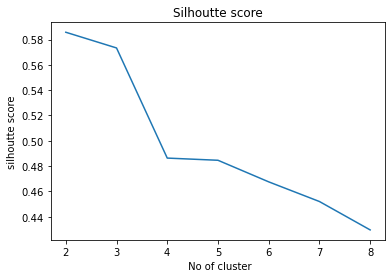

In [45]:
# presion (Sum of squared distance)
output=[]
range_of_cluster=[2,3,4,5,6,7,8]
for i in range_of_cluster:
    kmean=KMeans(n_clusters=i,max_iter=50)
    kmean.fit(final_sample)
    labels=kmean.labels_
    output.append(silhouette_score(final_sample,labels))
    plt.xticks([0,1,2,3,4,5,6],[2,3,4,5,6,7,8])
    print("silhoutte score for ",i,"is",silhouette_score(final_sample,labels))
    plt.title("Silhoutte score")
    plt.xlabel(" No of cluster")
    plt.ylabel("silhoutte score")
    
plt.plot(output);

sum of explained error score for  2 is 195.72348046295812
sum of explained error score for  3 is 82.69381153081008
sum of explained error score for  4 is 59.03516957859019
sum of explained error score for  5 is 44.520725813934604
sum of explained error score for  6 is 35.54146863828244
sum of explained error score for  7 is 29.642764014536887
sum of explained error score for  8 is 24.155810985404734


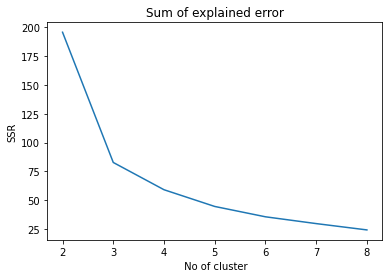

In [46]:
# checking by elbow method
output=[]
range_of_cluster=[2,3,4,5,6,7,8]
for i in range_of_cluster:
    kmean=KMeans(n_clusters=i,max_iter=50)
    kmean.fit(final_sample)
    labels=kmean.labels_
    output.append(kmean.inertia_)
    plt.xticks([0,1,2,3,4,5,6],[2,3,4,5,6,7,8])
    print("sum of explained error score for ",i,"is",kmean.inertia_)
    plt.title("Sum of explained error")
    plt.xlabel(" No of cluster")
    plt.ylabel("SSR")
    
plt.plot(output);

- Here we want less sum of squared error or high silhoutte score.
- We see cluster 3 has high silhoutte score upto 0.57 and SSE is also high upto 82 .
- so we use cluster 4 has n_clusters for k-means which has high compared to 5,6,7 and also lower than cluster 3.

In [47]:
# KMeans Clustering 
kmean=KMeans(n_clusters=4,max_iter=50)
#learning a parameters
kmean.fit(final_sample)

KMeans(max_iter=50, n_clusters=4)

In [48]:
#checking labels 
print("Length of labels",len(kmean.labels_))
kmean.labels_

Length of labels 167


array([2, 0, 0, 2, 3, 3, 0, 1, 1, 0, 1, 1, 0, 3, 3, 1, 0, 2, 0, 0, 3, 0,
       3, 1, 3, 2, 2, 0, 2, 1, 0, 2, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 1, 3,
       1, 0, 0, 0, 0, 2, 0, 3, 0, 1, 1, 0, 2, 0, 1, 2, 1, 3, 0, 2, 2, 0,
       2, 3, 1, 0, 0, 3, 0, 1, 1, 1, 0, 1, 0, 3, 0, 0, 1, 0, 2, 3, 3, 2,
       2, 3, 3, 1, 3, 0, 2, 3, 3, 2, 1, 2, 3, 0, 0, 0, 3, 0, 2, 0, 0, 0,
       1, 1, 2, 2, 1, 1, 2, 3, 0, 0, 0, 3, 1, 1, 3, 3, 0, 0, 1, 0, 3, 3,
       2, 1, 3, 1, 0, 0, 1, 1, 0, 0, 2, 3, 1, 1, 0, 2, 3, 0, 2, 0, 0, 3,
       0, 2, 0, 1, 1, 1, 3, 0, 0, 3, 0, 0, 2])

In [49]:
#ceate final cluster with country data
final=country[["country","child_mort","income","gdpp"]]
final["Cluster_id"]=kmean.labels_

In [50]:
#data
final.head()

,country,child_mort,income,gdpp,Cluster_id
0,Afghanistan,90.2,1610.0,553.0,2
1,Albania,16.6,9930.0,4090.0,0
2,Algeria,27.3,12900.0,4460.0,0
3,Angola,119.0,5900.0,3530.0,2
4,Antigua and Barbuda,10.3,19100.0,12200.0,3


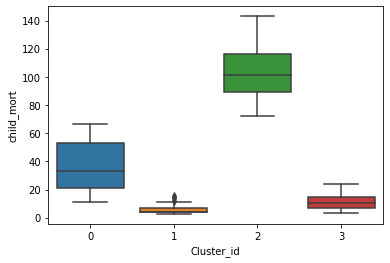

In [51]:
# Visualizing cluster
sns.boxplot(x="Cluster_id",y="child_mort",data=final);

**`inference`**:
- Here we see all clusters are uniformally distrbuted.
- for cluster 2 are spread longer than other group.
- there is very few contries have less child_mort count.

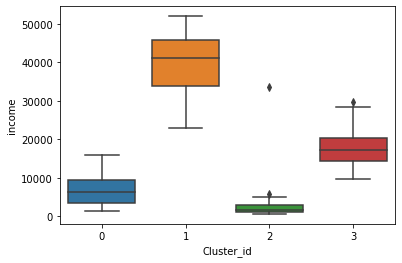

In [52]:
sns.boxplot(x="Cluster_id",y="income",data=final);

**`inference`**:
- Here we observed 

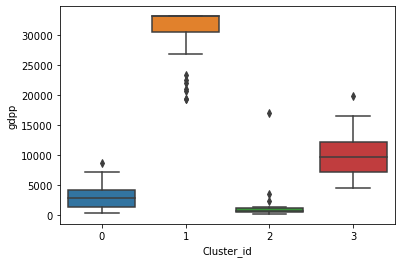

In [53]:
sns.boxplot(x="Cluster_id",y="gdpp",data=final);

In [54]:
final[final["Cluster_id"]==2].loc[:,"country"].tolist()

['Afghanistan',
 'Angola',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Lao',
 'Lesotho',
 'Liberia',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Sierra Leone',
 'Sudan',
 'Tanzania',
 'Togo',
 'Uganda',
 'Zambia']

- then the CEO needs to focus on the above list of countries

In [55]:
# now check is visualization is valid
preV=['Haiti',
 'Sierra Leone',
 'Central African Republic',
 'Mali',
 'Niger',
 'Burkina Faso',
 'Congo, Dem. Rep.',
 'Guinea-Bissau',
 'Benin',
 'Guinea',
 'Mozambique',
 'Burundi']
nexV=[]
for i in preV:
    if i not in list(final["country"]):
        nexV.append(i)
print(nexV)

[]


**`inference`**:
- Total inference from above three box plot, where our main objective is finding poor countrires list to know CEO,
- As per buisness problem we want countries that have more child_mort count, low income ,low gdpp thats it we got such cluster is 2 .

# Clustering based on hireachical.

In [57]:
# where we use use same scaled data which segmented
final_sample

,child_mort,income,gdpp
0,1.369430,-0.943936,-0.846341
1,-0.550424,-0.395181,-0.540827
2,-0.271315,-0.199291,-0.508868
3,2.120678,-0.660984,-0.589198
4,-0.714760,0.209637,0.159686
...,...,...,...
162,-0.221754,-0.855555,-0.637569
163,-0.537382,0.038151,0.271975
164,-0.375655,-0.753982,-0.780954
165,0.485149,-0.754642,-0.780954


- **here we dont required to check which no of k is suitable for cluster this is main advantage over kmean clustering of hireachical one**

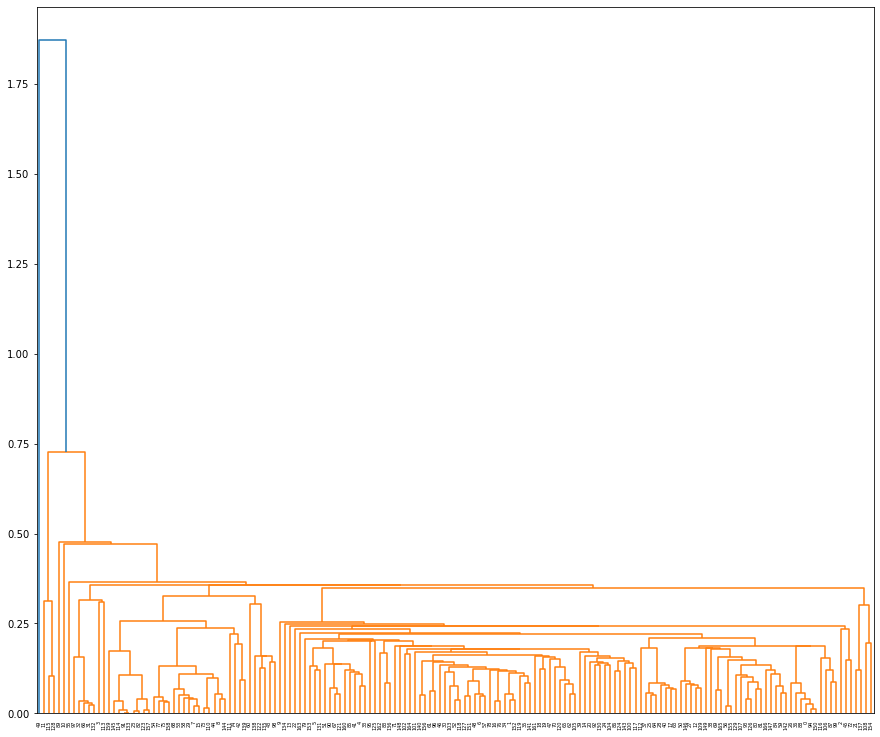

In [69]:
# single linkage
mergings=linkage(final_sample,method="single",metric="euclidean")
plt.figure(figsize=(15,13))
dendrogram(mergings)

plt.show()

- As we look graph are skwed to right are 2,3,4 arenot to be seen well for clustring. As per Business problem we want most poor country .
- As most we create 3 or 4 cluster but in dendrogram we see imbalanced nature

In [78]:
pd.DataFrame({"cls":cut_tree(mergings,n_clusters=5).reshape(-1,)}).loc[:,'cls'].value_counts()

0    161
2      3
4      1
3      1
1      1
Name: cls, dtype: int64

- **So go to complete llinakge to check how cluster formed** 

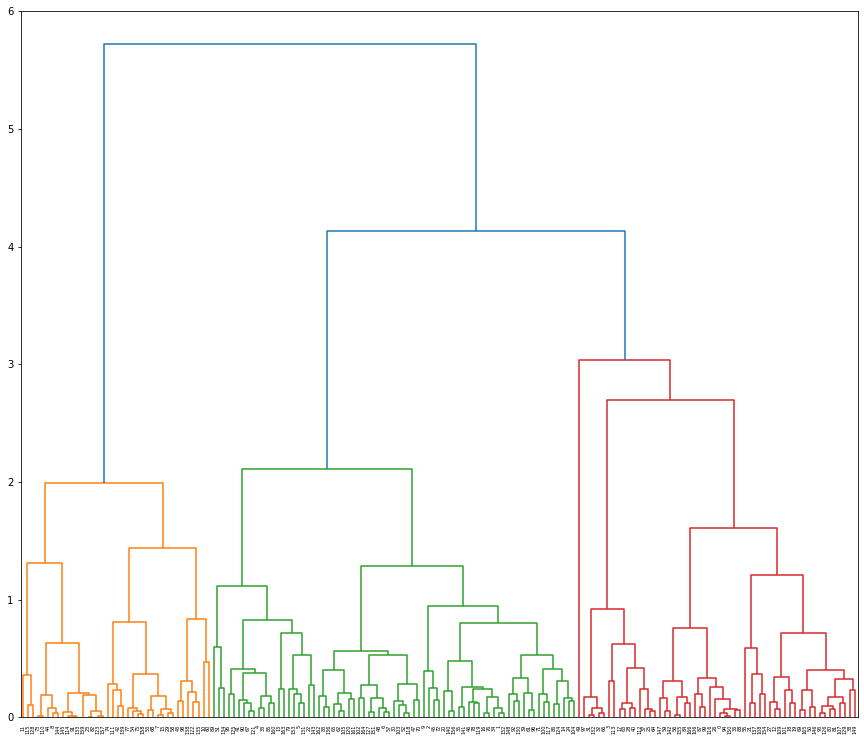

In [80]:
# single linkage
mergings2=linkage(final_sample,method="complete",metric="euclidean")
plt.figure(figsize=(15,13))
dendrogram(mergings2)
plt.show()

- **Here we see well formed hierachical tree ,and we can cut the tree in 3 cluster .....**

In [82]:
pd.DataFrame({"cls":cut_tree(mergings2,n_clusters=3).reshape(-1,)}).loc[:,'cls'].value_counts()

1    73
0    56
2    38
Name: cls, dtype: int64

In [84]:
# here all group are see be balanced now confirm it via box plot.
final["Cls_comp_3"]=cut_tree(mergings2,n_clusters=3).reshape(-1,)
final.head()

,country,child_mort,income,gdpp,Cluster_id,Cls_comp_3
0,Afghanistan,90.2,1610.0,553.0,2,0
1,Albania,16.6,9930.0,4090.0,0,1
2,Algeria,27.3,12900.0,4460.0,0,1
3,Angola,119.0,5900.0,3530.0,2,0
4,Antigua and Barbuda,10.3,19100.0,12200.0,3,1


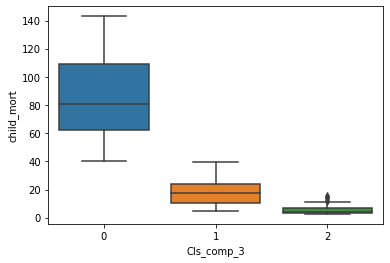

In [86]:
# Visualizing cluster
sns.boxplot(x="Cls_comp_3",y="child_mort",data=final);

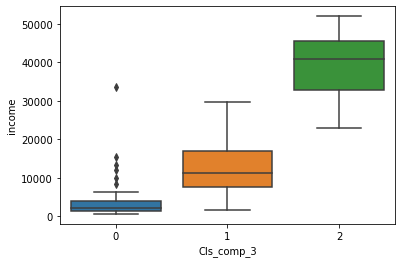

In [87]:
sns.boxplot(x="Cls_comp_3",y="income",data=final);

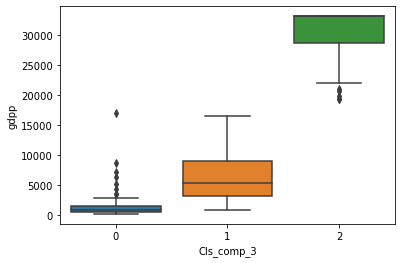

In [88]:
sns.boxplot(x="Cls_comp_3",y="gdpp",data=final);

**`inference`**:
- Total inference from above three box plot, where our main objective is finding poor countrires list to know CEO,
- As per buisness problem we want countries that have more child_mort count, low income ,low gdpp thats it we got such cluster is 2 .

In [96]:
print("Most poor country by Kmeans Clustering : \n \n",final[final["Cluster_id"]==2].loc[:,"country"].tolist(),"\n")
print("Most poor country by Hireachical with complete linkage Clustering : \n \n",final[final["Cluster_id"]==3].loc[:,"country"].tolist())

Most poor country by Kmeans Clustering : 
 
 ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Lao', 'Lesotho', 'Liberia', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Nigeria', 'Pakistan', 'Sierra Leone', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia'] 

Most poor country by Hireachical with complete linkage Clustering : 
 
 ['Antigua and Barbuda', 'Argentina', 'Barbados', 'Belarus', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Estonia', 'Grenada', 'Hungary', 'Iran', 'Kazakhstan', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Montenegro', 'Panama', 'Poland', 'Romania', 'Russia', 'Serbia', 'Seychelles', 'Slovak Republic', 'Suriname', 'Thailand', 'Turkey', 'Uruguay', 'Venezu

- **Here see no single country matches . Both have diffrent result.........**